In [1]:
# We want NF hyperparameter sensitivity
# Look at individual combinations of NF, sampler, target
# There are 6 experiments for each such combination
# Compute the empirical variance for each 6-element experiment
# Rank the flows according to their variance (standardized rank over variances, get its mean and SE)

In [2]:
import json
import pandas as pd
from util import standardized_rank

with open("../results.json", 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['general_experiment'])
df = df[df['flow'] != 'None']

In [3]:

# Compare NF hyperparameter sensitivity on each benchmark individually, rank them for each benchmark
# Then give the standardized rank across all
from util import get_standard_flow_order

data = {
    'jump': standardized_rank(
        df[~df['sampler'].str.contains('neutra')],
        rank_what=['flow'],
        rank_across=['benchmark'],
        metric='second_moment_squared_bias',
        summary='var'
    ),
    'neutra': standardized_rank(
        df[df['sampler'].str.contains('neutra')],
        rank_what=['flow'],
        rank_across=['benchmark'],
        metric='second_moment_squared_bias',
        summary='var'
    ),
    'imh': standardized_rank(
        df[df['sampler'].str.contains('imh')],
        rank_what=['flow'],
        rank_across=['benchmark'],
        metric='second_moment_squared_bias',
        summary='var'
    ),
    'jump_mh': standardized_rank(
        df[df['sampler'].str.contains('jump_mh')],
        rank_what=['flow'],
        rank_across=['benchmark'],
        metric='second_moment_squared_bias',
        summary='var'
    ),
    'jump_hmc': standardized_rank(
        df[df['sampler'].str.contains('jump_hmc')],
        rank_what=['flow'],
        rank_across=['benchmark'],
        metric='second_moment_squared_bias',
        summary='var'
    ),
    'neutra_mh': standardized_rank(
        df[df['sampler'].str.contains('neutra_mh')],
        rank_what=['flow'],
        rank_across=['benchmark'],
        metric='second_moment_squared_bias',
        summary='var'
    ),
    'neutra_hmc': standardized_rank(
        df[df['sampler'].str.contains('neutra_hmc')],
        rank_what=['flow'],
        rank_across=['benchmark'],
        metric='second_moment_squared_bias',
        summary='var'
    )
}

data = {
    k: v.iloc[get_standard_flow_order([t for t, in v.index])].reset_index()
    for k, v in data.items()
}

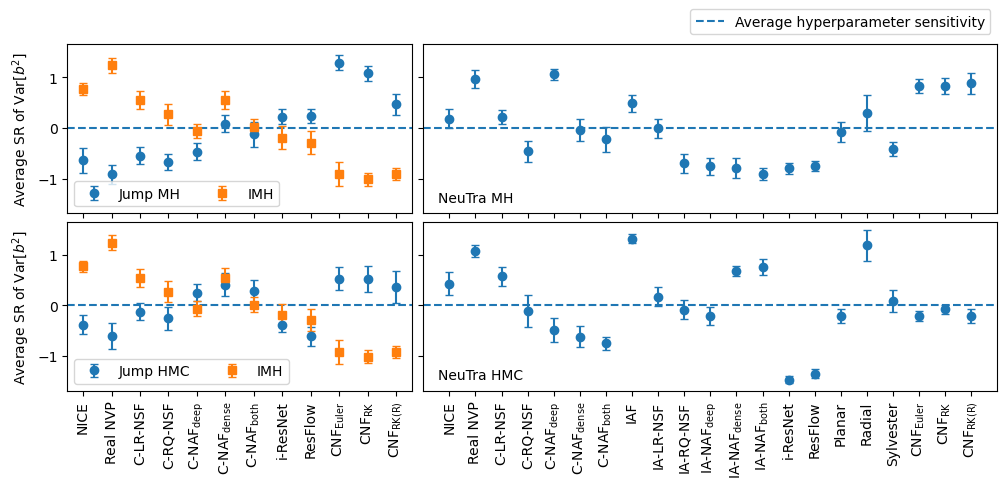

In [4]:
import matplotlib.pyplot as plt
from util import FLOW_PRETTY_MATH

fig, axes = plt.subplots(2, 2, figsize=(12, 4.5), width_ratios=[3, 5], sharey=True)

ax = axes[0, 0]
tmp = data['jump_mh']

ax.axhline(0, linestyle='dashed')
ax.errorbar(x=tmp.index, y=tmp['mean_rank'], yerr=tmp['sem_rank'], linestyle='', capsize=3, marker='o', label='Jump MH')
# ax.set_xticks(tmp.index, [FLOW_PRETTY_MATH[t] for t in tmp['flow']], rotation=90)
ax.set_ylabel('Average SR of $\\mathrm{Var}[b^2]$')
# ax.text(0.975, 0.05, 'Hyperparameter-robust architecture', transform=ax.transAxes, va='bottom', ha='right')
# ax.text(0.975, 0.95, 'Hyperparameter-sensitive architecture', transform=ax.transAxes, va='top', ha='right')
# ax.text(0.05, 0.05, 'Jump MH', transform=ax.transAxes, va='bottom', ha='left')
tmp = data['imh']
ax.errorbar(x=tmp.index, y=tmp['mean_rank'], yerr=tmp['sem_rank'], linestyle='', capsize=3, marker='s', label='IMH')
ax.legend(loc='lower left', ncol=2)

ax = axes[0, 1]
tmp = data['neutra_mh']

ax.axhline(0, linestyle='dashed', label='Average hyperparameter sensitivity')
ax.errorbar(x=tmp.index, y=tmp['mean_rank'], yerr=tmp['sem_rank'], linestyle='', capsize=3, marker='o')
# ax.set_xticks(tmp.index, [FLOW_PRETTY_MATH[t] for t in tmp['flow']], rotation=90)
# ax.set_ylabel('Average SR of $\\mathrm{Var}[b^2]$')
ax.text(0.025, 0.05, 'NeuTra MH', transform=ax.transAxes, va='bottom', ha='left')
ax.legend(bbox_to_anchor=(1.0, 1.25), loc='upper right')

ax = axes[1, 0]
tmp = data['jump_hmc']

ax.axhline(0, linestyle='dashed')
ax.errorbar(x=tmp.index, y=tmp['mean_rank'], yerr=tmp['sem_rank'], linestyle='', capsize=3, marker='o', label='Jump HMC')
# ax.set_xticks(tmp.index, [FLOW_PRETTY_MATH[t] for t in tmp['flow']], rotation=90)
ax.set_ylabel('Average SR of $\\mathrm{Var}[b^2]$')
# ax.text(0.975, 0.05, 'Hyperparameter-robust architecture', transform=ax.transAxes, va='bottom', ha='right')
# ax.text(0.975, 0.95, 'Hyperparameter-sensitive architecture', transform=ax.transAxes, va='top', ha='right')
ax.set_xticks(tmp.index, [FLOW_PRETTY_MATH[t] for t in tmp['flow']], rotation=90)
# ax.text(0.05, 0.05, 'Jump HMC', transform=ax.transAxes, va='bottom', ha='left')
tmp = data['imh']
ax.errorbar(x=tmp.index, y=tmp['mean_rank'], yerr=tmp['sem_rank'], linestyle='', capsize=3, marker='s', label='IMH')
ax.legend(loc='lower left', ncol=2)

ax = axes[1, 1]
tmp = data['neutra_hmc']

ax.axhline(0, linestyle='dashed', label='Average hyperparameter sensitivity')
ax.errorbar(x=tmp.index, y=tmp['mean_rank'], yerr=tmp['sem_rank'], linestyle='', capsize=3, marker='o')
# ax.set_xticks(tmp.index, [FLOW_PRETTY_MATH[t] for t in tmp['flow']], rotation=90)
# ax.set_ylabel('Average SR of $\\mathrm{Var}[b^2]$')
ax.set_xticks(tmp.index, [FLOW_PRETTY_MATH[t] for t in tmp['flow']], rotation=90)
ax.text(0.025, 0.05, 'NeuTra HMC', transform=ax.transAxes, va='bottom', ha='left')

fig.subplots_adjust(hspace=0.05, wspace=0.025)

# axes[0, 0].set_xticks(axes[1, 0].get_xticks())
# axes[0, 1].set_xticks(axes[1, 1].get_xticks())

axes[0, 0].set_xticks(axes[1, 0].get_xticks())
axes[0, 1].set_xticks(axes[1, 1].get_xticks())

fig.savefig('images/nf-sensitivity.pdf', bbox_inches='tight')
fig.savefig('images/nf-sensitivity.png', bbox_inches='tight', dpi=600)

plt.show()